# Case Study 2 - Social Media Analysis using Pandas and Seaborn 

### Problem Statement:
Analyzing Social Media Data - Dataset contains social media data such as the number of likes, comments, shares, etc.

You need to analyze the data and create visualizations to identify popular trends and patterns.

You can use Pandas to clean and manipulate the data and Seaborn to represent the data using visualizations.

Dataset: social media influencers – youtube.csv


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv("social media influencers - youtube.csv")
df.head()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K


## Cleaning and Preparing Data 

In [4]:
df.describe()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
count,1000,1000,723,1000,839,1000,962,791
unique,998,998,23,228,27,743,615,420
top,ETV Jabardasth,ETV Jabardasth,Music & Dance,10.1M,United States,1.1M,1.2K,1.8K
freq,2,2,224,34,291,18,17,14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   youtuber name     1000 non-null   object
 1   channel name      1000 non-null   object
 2   Category          723 non-null    object
 3   Subscribers       1000 non-null   object
 4   Audience Country  839 non-null    object
 5   avg views         1000 non-null   object
 6   avg likes         962 non-null    object
 7   avg comments      791 non-null    object
dtypes: object(8)
memory usage: 62.6+ KB


#### Renaming the column names 

In [6]:
df.columns

Index(['youtuber name', 'channel name', 'Category', 'Subscribers',
       'Audience Country', 'avg views', 'avg likes', 'avg comments'],
      dtype='object')

In [7]:
df=df.rename(columns={
    'youtuber name':'Youtuber_Name', 
    'channel name':'Channel_Name', 
    'Audience Country':'Audience_Country',
    'avg views':'Average_Views',
    'avg likes':'Average_Likes', 
    'avg comments':'Average_Comments'  
})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Youtuber_Name     1000 non-null   object
 1   Channel_Name      1000 non-null   object
 2   Category          723 non-null    object
 3   Subscribers       1000 non-null   object
 4   Audience_Country  839 non-null    object
 5   Average_Views     1000 non-null   object
 6   Average_Likes     962 non-null    object
 7   Average_Comments  791 non-null    object
dtypes: object(8)
memory usage: 62.6+ KB


In [9]:
df.shape

(1000, 8)

In [11]:
df.head(20)

,Youtuber_Name,Channel_Name,Category,Subscribers,Audience_Country,Average_Views,Average_Likes,Average_Comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K
5,✿ Kids Diana Show,✿ Kids Diana Show,Animation,92.4M,NaN,10.6M,46.8K,NaN
6,Like Nastya,Like Nastya,Animation,90.1M,NaN,13.7M,74.2K,NaN
7,WWEFanNation,WWE,Video games,86.9M,United States,76.6K,2.8K,163
8,zeemusiccompany,Zee Music Company,Music & Dance,82.7M,India,108.7K,4.2K,155
9,Vlad and Niki,Vlad and Niki,Toys,80.4M,NaN,7M,42.2K,NaN


#### Checking and removing duplicate values 

In [14]:
df.loc[df.duplicated()]

,Youtuber_Name,Channel_Name,Category,Subscribers,Audience_Country,Average_Views,Average_Likes,Average_Comments
550,ETV Jabardasth,ETV Jabardasth,NaN,12.5M,India,192.6K,2.7K,44


In [15]:
df.query('Youtuber_Name == "ETV Jabardasth"')

,Youtuber_Name,Channel_Name,Category,Subscribers,Audience_Country,Average_Views,Average_Likes,Average_Comments
549,ETV Jabardasth,ETV Jabardasth,NaN,12.5M,India,192.6K,2.7K,44
550,ETV Jabardasth,ETV Jabardasth,NaN,12.5M,India,192.6K,2.7K,44


In [16]:
df = df.loc[~df.duplicated(subset=["Youtuber_Name"])] \
    .reset_index(drop=True).copy()

In [17]:
df.loc[df.duplicated()]

,Youtuber_Name,Channel_Name,Category,Subscribers,Audience_Country,Average_Views,Average_Likes,Average_Comments


#### substitute Nan value with unknown 

In [19]:
df["Category"].fillna(("Unknown"),inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Youtuber_Name     998 non-null    object
 1   Channel_Name      998 non-null    object
 2   Category          998 non-null    object
 3   Subscribers       998 non-null    object
 4   Audience_Country  837 non-null    object
 5   Average_Views     998 non-null    object
 6   Average_Likes     960 non-null    object
 7   Average_Comments  789 non-null    object
dtypes: object(8)
memory usage: 62.5+ KB


In [21]:
df["Audience_Country"].fillna(("Unknown"),inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Youtuber_Name     998 non-null    object
 1   Channel_Name      998 non-null    object
 2   Category          998 non-null    object
 3   Subscribers       998 non-null    object
 4   Audience_Country  998 non-null    object
 5   Average_Views     998 non-null    object
 6   Average_Likes     960 non-null    object
 7   Average_Comments  789 non-null    object
dtypes: object(8)
memory usage: 62.5+ KB


In [31]:
df.sort_values(by='Subscribers',ascending=False,inplace=True)

In [32]:
df.head(10)

,Youtuber_Name,Channel_Name,Category,Subscribers,Audience_Country,Average_Views,Average_Likes,Average_Comments
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K
5,✿ Kids Diana Show,✿ Kids Diana Show,Animation,92.4M,Unknown,10.6M,46.8K,NaN
6,Like Nastya,Like Nastya,Animation,90.1M,Unknown,13.7M,74.2K,NaN
861,BestCodComedy,BCC Gaming,Video games,9.9M,United States,2.3K,75,8
873,Will Smith,Will Smith,Movies,9.9M,United States,332.2K,10.5K,5.5K
872,Nickelodeon,Nickelodeon,Movies,9.9M,Unknown,60K,767,NaN
869,historychannel,HISTORY,Unknown,9.9M,United States,71.2K,1.3K,108
860,whoisjimmy,How Ridiculous,Sports,9.9M,United States,25.5M,750.3K,5.2K
875,WAMIndiaMovies,Wamindia Movies,Unknown,9.9M,India,138.5K,2.2K,41
874,Heroine Movies 2022,Heroine Movies 2022,Daily vlogs,9.9M,India,151.9K,1.1K,22


#### Converting M and K to numeric values (million and thousand conversion)

In [35]:
def convert_to_numeric(value):
    try:
        suffix = value[-1]
        if suffix == 'M':
            constant = 1000000
        elif suffix == 'K':
            constant = 1000
        else:
            return value
        return int(float(value[:-1]) * constant)
    except:
        return value

In [36]:
df["Average_Views"]=df["Average_Views"].apply(convert_to_numeric)

In [37]:
df.head()

,Youtuber_Name,Channel_Name,Category,Subscribers,Audience_Country,Average_Views,Average_Likes,Average_Comments
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30600000,1.7M,67.7K
5,✿ Kids Diana Show,✿ Kids Diana Show,Animation,92.4M,Unknown,10600000,46.8K,NaN
6,Like Nastya,Like Nastya,Animation,90.1M,Unknown,13700000,74.2K,NaN
861,BestCodComedy,BCC Gaming,Video games,9.9M,United States,2300,75,8
873,Will Smith,Will Smith,Movies,9.9M,United States,332200,10.5K,5.5K


#### Converting from Object to Numeric data type 

In [38]:
df["Subscribers"]=df["Subscribers"].apply(convert_to_numeric)

In [39]:
df["Average_Likes"]=df["Average_Likes"].apply(convert_to_numeric)

In [40]:
df["Average_Comments"]=df["Average_Comments"].apply(convert_to_numeric)

In [41]:
df.head()

,Youtuber_Name,Channel_Name,Category,Subscribers,Audience_Country,Average_Views,Average_Likes,Average_Comments
4,MrBeast6000,MrBeast,Video games,92500000,United States,30600000,1700000,67700
5,✿ Kids Diana Show,✿ Kids Diana Show,Animation,92400000,Unknown,10600000,46800,NaN
6,Like Nastya,Like Nastya,Animation,90100000,Unknown,13700000,74200,NaN
861,BestCodComedy,BCC Gaming,Video games,9900000,United States,2300,75,8
873,Will Smith,Will Smith,Movies,9900000,United States,332200,10500,5500


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 4 to 823
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Youtuber_Name     998 non-null    object
 1   Channel_Name      998 non-null    object
 2   Category          998 non-null    object
 3   Subscribers       998 non-null    int64 
 4   Audience_Country  998 non-null    object
 5   Average_Views     998 non-null    object
 6   Average_Likes     960 non-null    object
 7   Average_Comments  789 non-null    object
dtypes: int64(1), object(7)
memory usage: 70.2+ KB


#### Filling Nan Values with mean of adjacent values

In [44]:
df['Average_Likes'] = pd.to_numeric(df['Average_Likes'], errors='coerce')

In [45]:
df['Average_Likes'].fillna((df['Average_Likes'].shift() + df['Average_Likes'].shift(-1)) / 2, inplace=True)

In [46]:
df['Average_Comments'] = pd.to_numeric(df['Average_Comments'], errors='coerce')

In [47]:
df['Average_Comments'].fillna((df['Average_Comments'].shift() + df['Average_Comments'].shift(-1)) / 2, inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 4 to 823
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Youtuber_Name     998 non-null    object 
 1   Channel_Name      998 non-null    object 
 2   Category          998 non-null    object 
 3   Subscribers       998 non-null    int64  
 4   Audience_Country  998 non-null    object 
 5   Average_Views     998 non-null    object 
 6   Average_Likes     996 non-null    float64
 7   Average_Comments  921 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 70.2+ KB


In [54]:
# mising = df[df.isna().any(axis=1)]
# print(mising)

In [55]:
 df['Average_Views'] = pd.to_numeric(df['Average_Views'], errors='coerce')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 4 to 823
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Youtuber_Name     998 non-null    object 
 1   Channel_Name      998 non-null    object 
 2   Category          998 non-null    object 
 3   Subscribers       998 non-null    int64  
 4   Audience_Country  998 non-null    object 
 5   Average_Views     998 non-null    int64  
 6   Average_Likes     996 non-null    float64
 7   Average_Comments  921 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 70.2+ KB


## Answering Questions 

In [58]:
df.describe()

,Subscribers,Average_Views,Average_Likes,Average_Comments
count,9.980000e+02,9.980000e+02,9.960000e+02,921.000000
mean,1.741413e+07,1.102569e+06,5.165371e+04,3662.521716
std,1.381521e+07,3.441486e+06,2.117390e+05,16161.186844
min,9.200000e+06,0.000000e+00,5.000000e+00,1.000000
25%,1.070000e+07,5.430000e+04,1.300000e+03,75.000000
50%,1.330000e+07,2.672500e+05,6.400000e+03,372.000000
75%,1.835000e+07,9.254500e+05,4.020000e+04,1875.000000
max,2.121000e+08,8.050000e+07,5.600000e+06,313600.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

<Figure size 720x576 with 0 Axes>

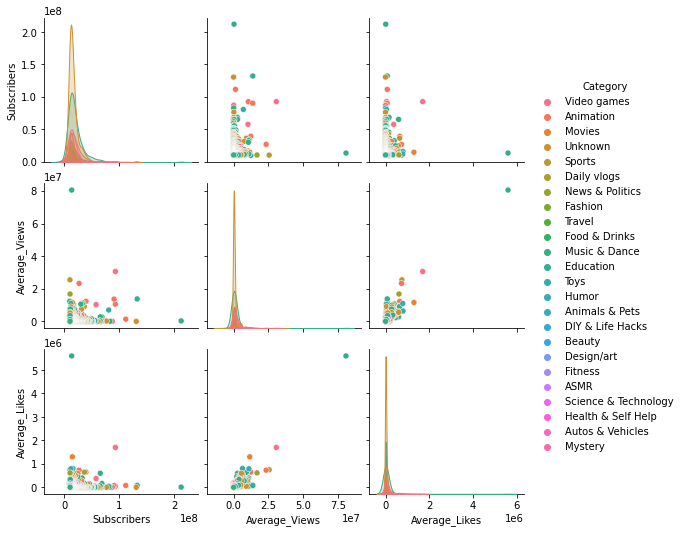

In [115]:
plt.figure(figsize=(10,8))
sns.pairplot(df, vars=['Subscribers','Average_Views', 'Average_Likes'], hue='Category')
plt.show()

In [67]:
df_corr=df.dropna().corr()
df_corr

,Subscribers,Average_Views,Average_Likes,Average_Comments
Subscribers,1.000000,0.100920,0.053696,0.029372
Average_Views,0.100920,1.000000,0.922506,0.692639
Average_Likes,0.053696,0.922506,1.000000,0.743181
Average_Comments,0.029372,0.692639,0.743181,1.000000


Text(0.5, 1.0, 'Correlations using Heatmap')

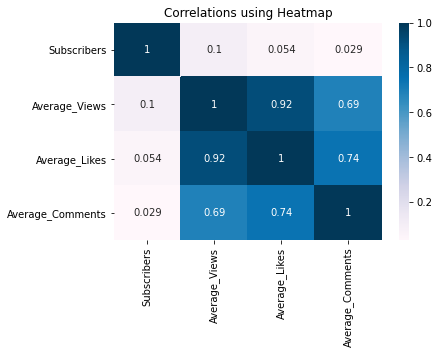

In [116]:
sns.heatmap(df_corr, annot=True, cmap='PuBu' )
plt.title("Correlations using Heatmap")

Text(0.5, 1.0, 'Subscribers vs Average Views')

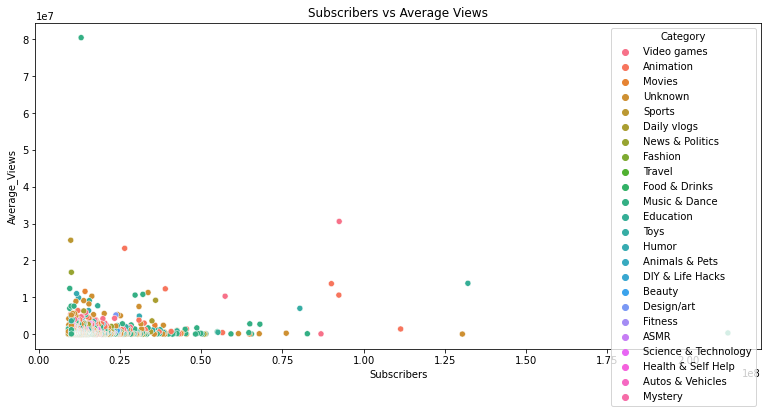

In [117]:
plt.figure(figsize=(13,6))
sns.scatterplot(data=df,x='Subscribers',y='Average_Views', hue='Category')
plt.title("Subscribers vs Average Views")

In [79]:
df['Category'].value_counts()

Unknown                 276
Music & Dance           224
Animation                97
Video games              83
News & Politics          49
Toys                     45
Movies                   38
Daily vlogs              35
Education                33
Humor                    30
Science & Technology     17
Food & Drinks            16
DIY & Life Hacks         15
Sports                   11
Fashion                   7
Design/art                4
Animals & Pets            4
Fitness                   3
ASMR                      3
Autos & Vehicles          2
Health & Self Help        2
Beauty                    2
Mystery                   1
Travel                    1
Name: Category, dtype: int64

In [85]:
Top_Category=df.groupby(['Category'])[['Average_Views']].sum().sort_values(by='Average_Views',ascending=False)
Top_Category

,Average_Views
Category,
Music & Dance,248263873
Unknown,212922598
Animation,152512800
Video games,148644400
Humor,48324899
Education,46210798
Movies,40439800
Daily vlogs,38103100
Toys,35984800


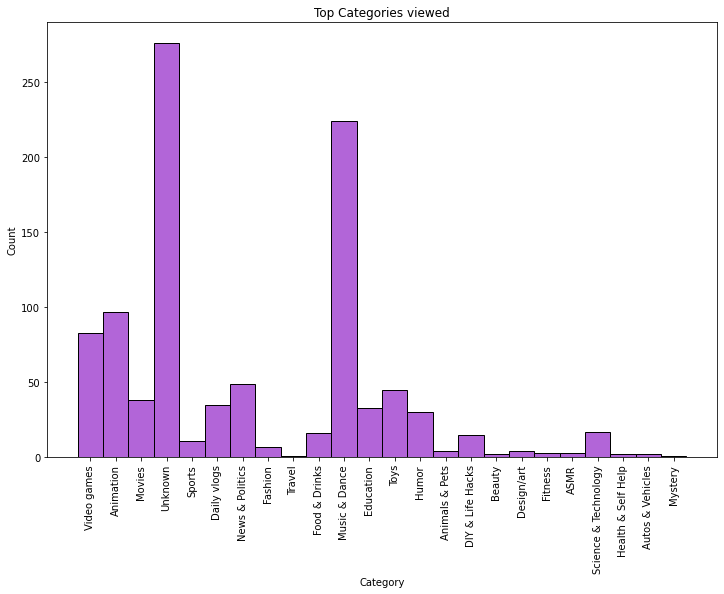

In [120]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='Category',color='darkorchid')
plt.title("Top Categories viewed")
plt.xticks(rotation=90);

#### Conclusion: Top viewed category is Music & Dance. 

#### Top Youtubers with Most number of Subscribers 

In [177]:
top_youtubers = df.groupby('Youtuber_Name')[["Subscribers"]].sum().sort_values(by="Subscribers",ascending=False).head(10).reset_index()
top_youtubers

,Youtuber_Name,Subscribers
0,tseries,212100000
1,checkgate,132100000
2,setindia,130400000
3,PewDiePie,111400000
4,MrBeast6000,92500000
5,✿ Kids Diana Show,92400000
6,Like Nastya,90100000
7,WWEFanNation,86900000
8,zeemusiccompany,82700000
9,Vlad and Niki,80400000


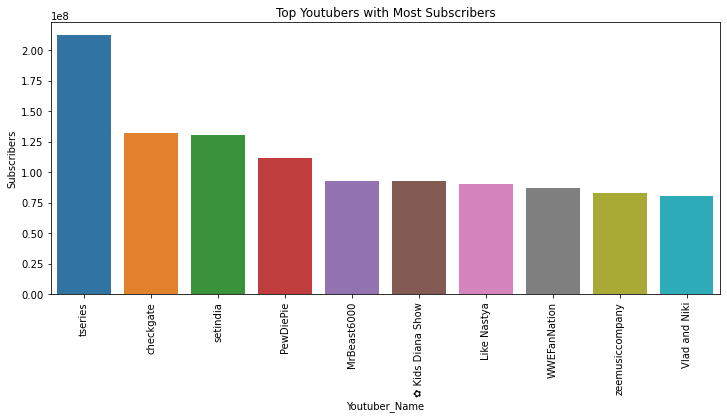

In [178]:
plt.figure(figsize=(12,5))
sns.barplot(x='Youtuber_Name', y='Subscribers', data=top_youtubers)
plt.title("Top Youtubers with Most Subscribers")
plt.xticks(rotation=90);

#### The Top Youtuber with Most Subscribers is tseries , followed by checkgate, setIndia, PewDiePie 

#### Top Audience Countries

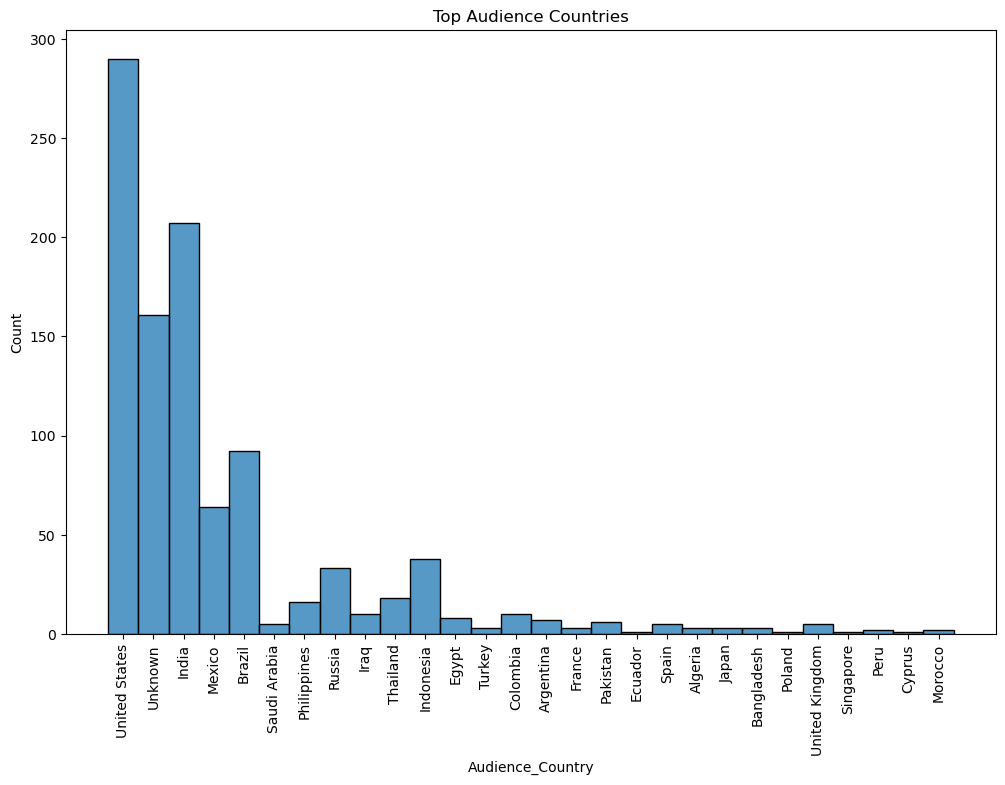

In [122]:
plt.figure(figsize = (12,8),dpi=100)
sns.histplot(x="Audience_Country", data=df)
plt.title("Top Audience Countries")
plt.xticks(rotation=90);

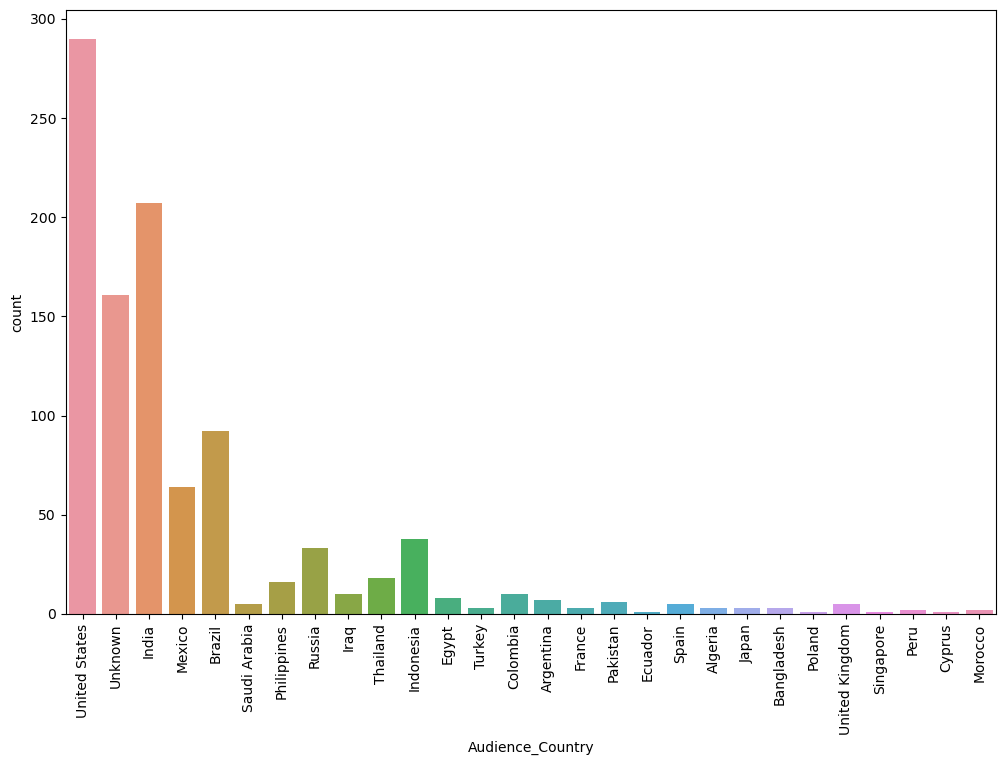

In [111]:
plt.figure(figsize = (12,8),dpi=100)
sns.countplot(x="Audience_Country", data=df)
plt.xticks(rotation=90);

#### Top viewed youtubers in India 

In [140]:
df_india = df.query('Audience_Country == "India" ')

In [141]:
df_india

,Youtuber_Name,Channel_Name,Category,Subscribers,Audience_Country,Average_Views,Average_Likes,Average_Comments
875,WAMIndiaMovies,Wamindia Movies,Unknown,9900000,India,138500,2200.0,41.0
874,Heroine Movies 2022,Heroine Movies 2022,Daily vlogs,9900000,India,151900,1100.0,22.0
871,Nirahua Music World,Nirahua Music World,Unknown,9900000,India,112600,5000.0,152.0
866,Comedy Captain,Comedy Captain,Unknown,9900000,India,16300,127.0,3.0
878,5-Minute Recipes,5-Minute Recipes,Unknown,9800000,India,76400,860.0,15.0
...,...,...,...,...,...,...,...,...
837,Captain Watch Hits,Captain Watch Hits,Unknown,10100000,India,41200,234.0,6.0
821,TWO SIDE GAMERS,TWO SIDE GAMERS,Unknown,10100000,India,681400,62300.0,1600.0
827,TV9 Bharatvarsh,TV9 Bharatvarsh,News & Politics,10100000,India,27900,484.0,19.0
836,Republic Bharat,Republic Bharat,News & Politics,10100000,India,15400,43400.0,17.0


In [172]:
df_india_sub = df_india.groupby('Youtuber_Name')[["Subscribers"]].sum().sort_values(by="Subscribers",ascending=False).head(10).reset_index()
df_india_sub

,Youtuber_Name,Subscribers
0,tseries,212100000
1,setindia,130400000
2,zeemusiccompany,82700000
3,GoldminesTelefilms,67900000
4,sabtv,64900000
5,zeetv,61500000
6,filmigaane,59200000
7,BHOJPURIWAVE,51500000
8,colorstv,51200000
9,aajtaktv,50900000


In [174]:
df_india_sub.columns

Index(['Youtuber_Name', 'Subscribers'], dtype='object')

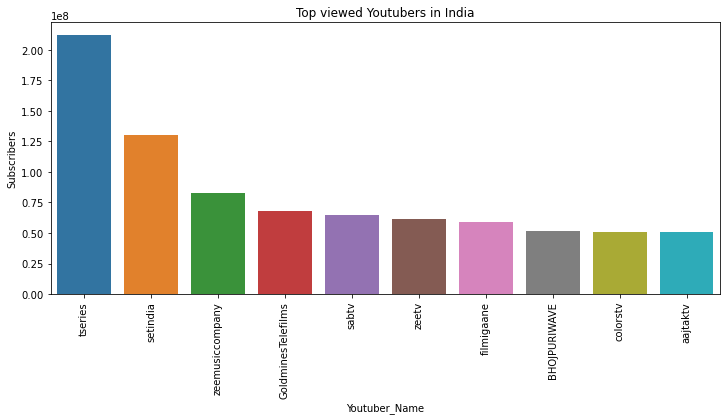

In [176]:
plt.figure(figsize=(12,5))
sns.barplot(x='Youtuber_Name', y='Subscribers', data=df_india_sub)
plt.title("Top viewed Youtubers in India")
plt.xticks(rotation=90);

#### Top viewed youtubers in India are tseries, setIndia, zeemusiccompany and so on..